In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
temp = pd.read_csv('temperature.csv')
humidity = pd.read_csv('humidity.csv')
covid = pd.read_csv('covid19.csv')

In [3]:
data = pd.concat([temp[['date', 'da']], humidity['humidity'], covid[['icu', 'deaths', 'tests', 'confirmed']]], axis = 1)

In [4]:
traffic = pd.read_csv('traffic.csv')
arr = []
for i,j in traffic.iterrows():
    arr.append(j[3])
res = []
for i in range(0,len(arr)-2,2):
    res.append((arr[i] + arr[i+1])/2)
df = pd.concat([data, pd.DataFrame(res)], axis = 1)
df.dropna(axis = 0, inplace = True)
df.columns = ["date", "temp", "humidity", "icu", "deaths", "tests", "confirmed", "traffic_volume"]

In [5]:
df.to_csv('final_data.csv')    #save as csv

In [6]:
df    #check the data

,date,temp,humidity,icu,deaths,tests,confirmed,traffic_volume
0,2020/3/4,15.4,88.462963,0,1,325,55,89.5
1,2020/3/5,18.0,90.746269,0,1,508,67,94.0
2,2020/3/6,15.4,85.944444,0,1,715,81,79.5
3,2020/3/7,12.6,83.250000,0,1,1206,100,73.5
4,2020/3/8,12.4,76.000000,0,1,1382,112,71.0
...,...,...,...,...,...,...,...,...
256,2020/11/15,22.8,94.229508,1143,18265,18839535,1035981,47.5
257,2020/11/16,23.9,96.583333,1199,18304,18993274,1047360,53.0
258,2020/11/17,21.1,87.000000,1318,18360,19191038,1058096,66.5
259,2020/11/18,14.9,85.205882,1252,18467,19424942,1069517,66.0


Text(0.5, 0, 'Traffic Volume')

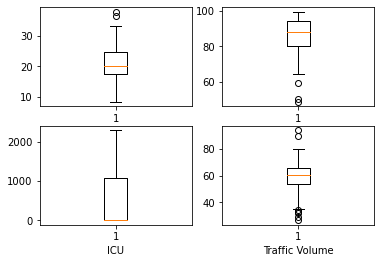

In [7]:
plt.subplot(2,2,1)
plt.boxplot(df["temp"])
plt.xlabel("Temperature")
plt.subplot(2,2,2)
plt.boxplot(df["humidity"])
plt.xlabel("Humidity")
plt.subplot(2,2,3)
plt.boxplot(df["icu"])
plt.xlabel("ICU")
plt.subplot(2,2,4)
plt.boxplot(df["traffic_volume"])
plt.xlabel("Traffic Volume")

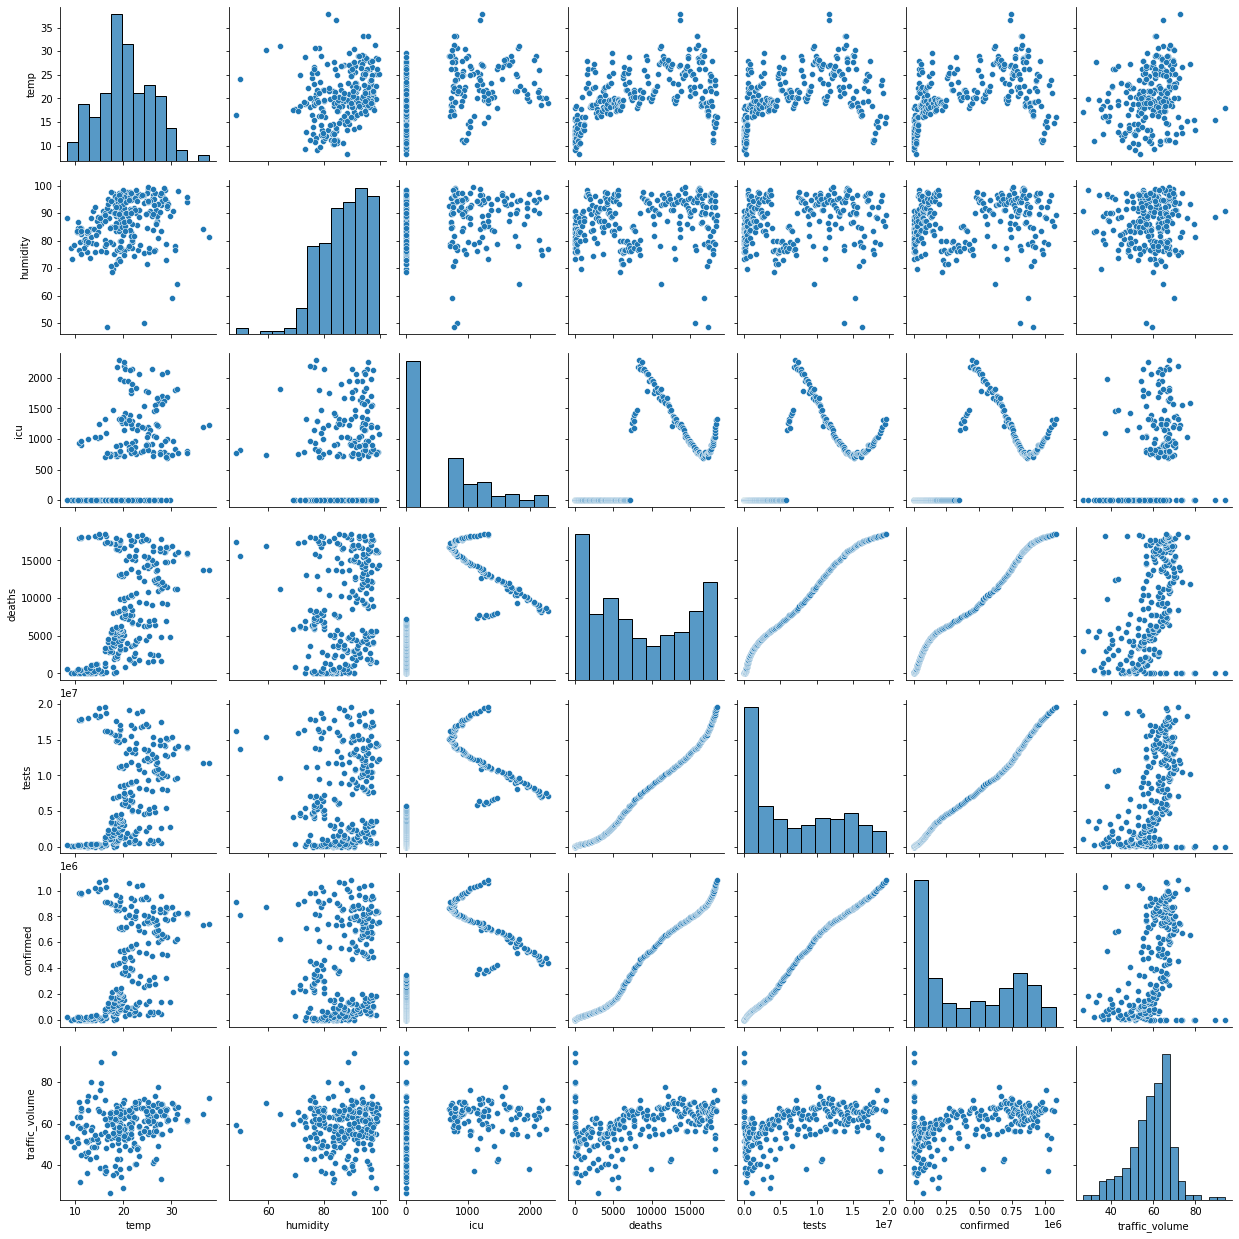

In [8]:
sns.pairplot(df)

In [9]:
df.drop("tests", axis = 1, inplace = True)    #similary data
df.drop("deaths",axis = 1, inplace = True) 

In [10]:
df = df[df["temp"] <= 35]    #delete edge value
df = df[df["traffic_volume"] >= 39]
df = df[df["traffic_volume"] <= 80]
df = df[df["humidity"] >63]

In [11]:
df

,date,temp,humidity,icu,confirmed,traffic_volume
2,2020/3/6,15.4,85.944444,0,81,79.5
3,2020/3/7,12.6,83.250000,0,100,73.5
4,2020/3/8,12.4,76.000000,0,112,71.0
5,2020/3/9,14.0,75.956522,0,172,73.0
6,2020/3/10,13.3,81.391304,0,179,80.0
...,...,...,...,...,...,...
256,2020/11/15,22.8,94.229508,1143,1035981,47.5
257,2020/11/16,23.9,96.583333,1199,1047360,53.0
258,2020/11/17,21.1,87.000000,1318,1058096,66.5
259,2020/11/18,14.9,85.205882,1252,1069517,66.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


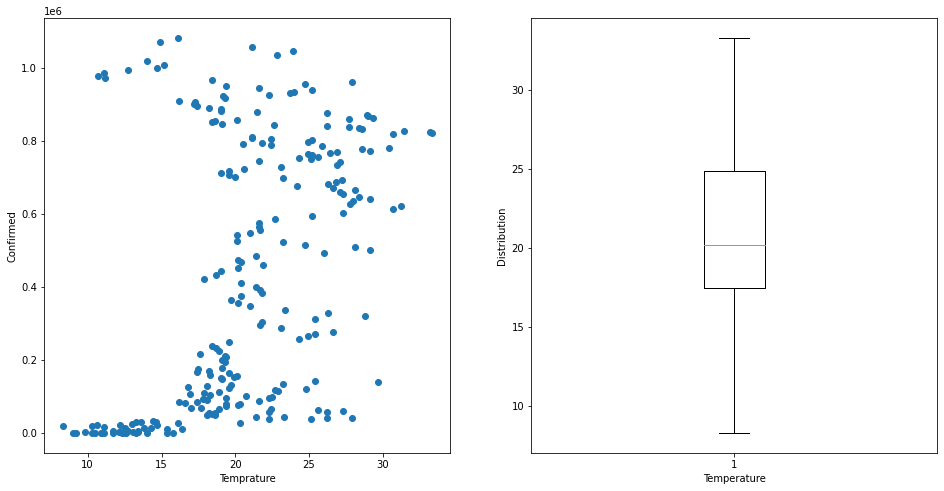

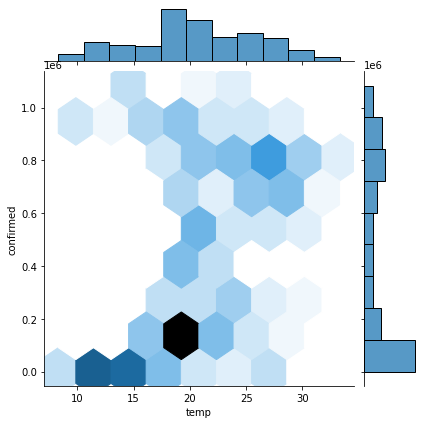

In [12]:
plt.figure(figsize = (16,8))    #show the relations between temprature and confirmed people
plt.subplot(1,2,1)
plt.scatter(df["temp"], df["confirmed"])
plt.xlabel("Temprature")
plt.ylabel("Confirmed")
plt.subplot(1,2,2)
plt.boxplot(df["temp"])
plt.xlabel("Temperature")
plt.ylabel("Distribution")
sns.jointplot(df["temp"], df["confirmed"], kind = "hex")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


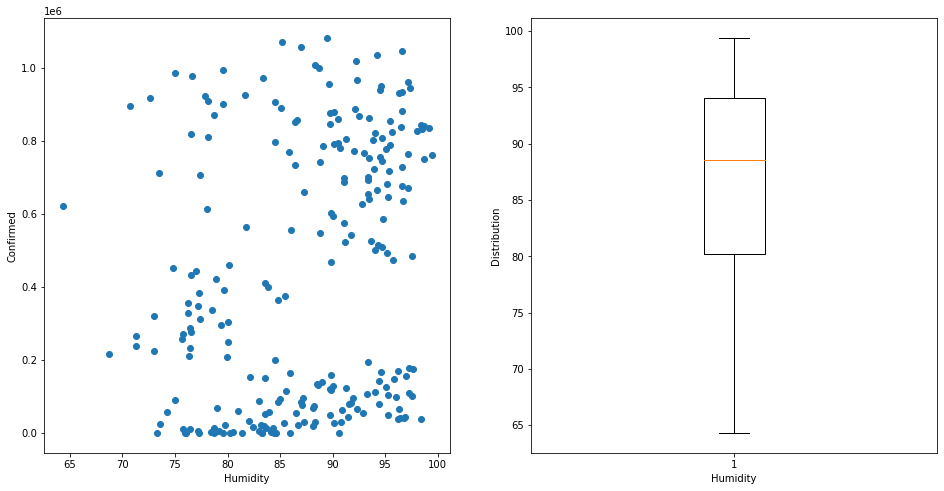

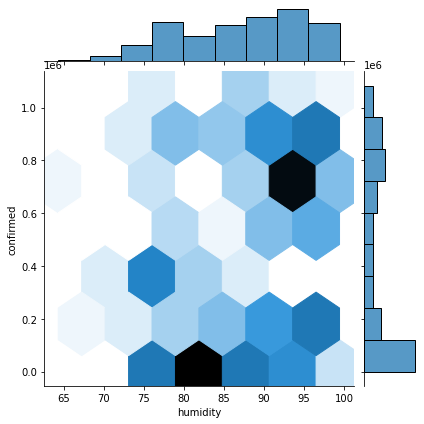

In [13]:
plt.figure(figsize = (16,8))    #show the relations between humidity and confirmed people
plt.subplot(1,2,1)
plt.scatter(df["humidity"], df["confirmed"])
plt.xlabel("Humidity")
plt.ylabel("Confirmed")
plt.subplot(1,2,2)
plt.boxplot(df["humidity"])
plt.xlabel("Humidity")
plt.ylabel("Distribution")
sns.jointplot(df["humidity"], df["confirmed"], kind = "hex")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


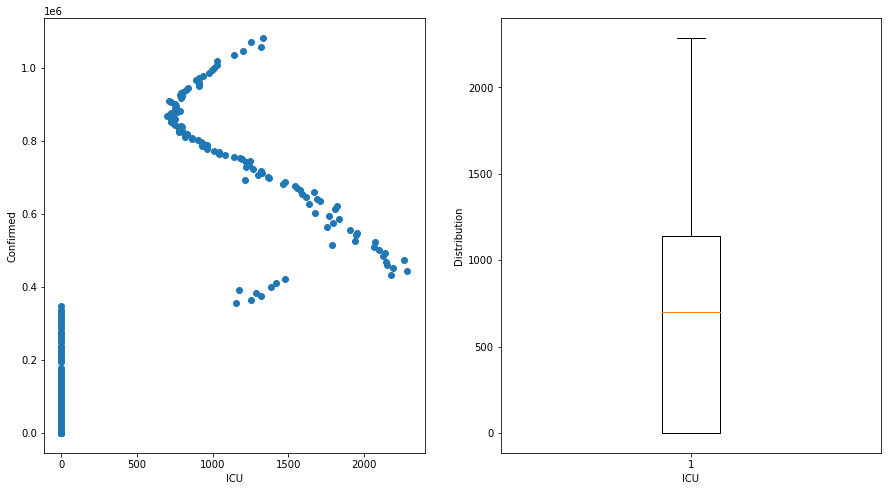

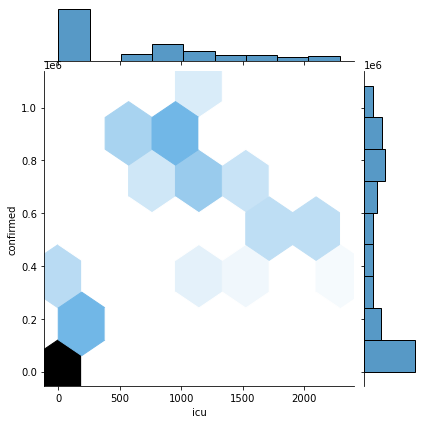

In [14]:
plt.figure(figsize = (15,8))    #show the relations between icu and confirmed people
plt.subplot(1,2,1)
plt.scatter(df["icu"], df["confirmed"])
plt.xlabel("ICU")
plt.ylabel("Confirmed")
plt.subplot(1,2,2)
plt.boxplot(df["icu"])
plt.xlabel("ICU")
plt.ylabel("Distribution")
sns.jointplot(df["icu"], df["confirmed"], kind = "hex")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


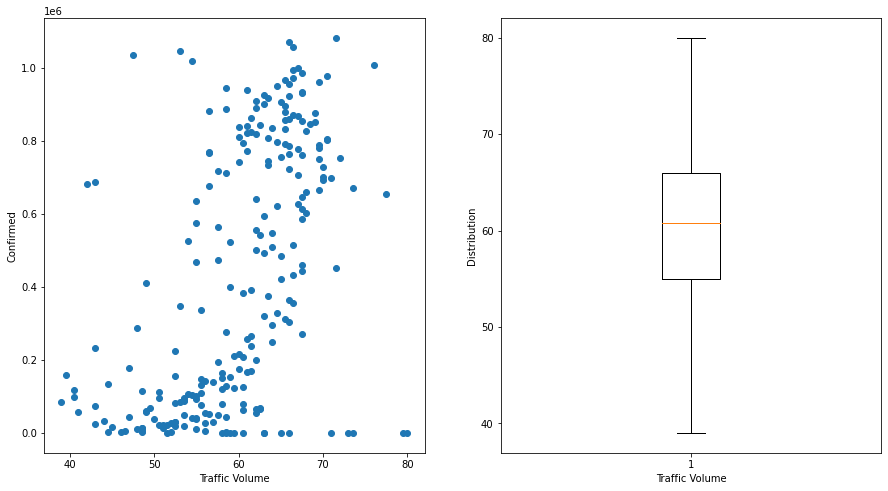

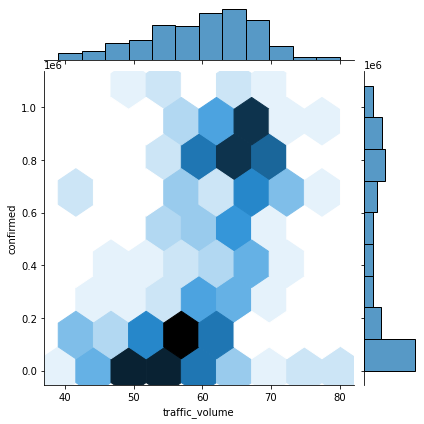

In [15]:
plt.figure(figsize = (15,8))    #show the relations between traffic volume and confirmed people
plt.subplot(1,2,1)
plt.scatter(df["traffic_volume"], df["confirmed"])
plt.xlabel("Traffic Volume")
plt.ylabel("Confirmed")
plt.subplot(1,2,2)
plt.boxplot(df["traffic_volume"])
plt.xlabel("Traffic Volume")
plt.ylabel("Distribution")
sns.jointplot(df["traffic_volume"], df["confirmed"], kind = "hex")

<AxesSubplot:>

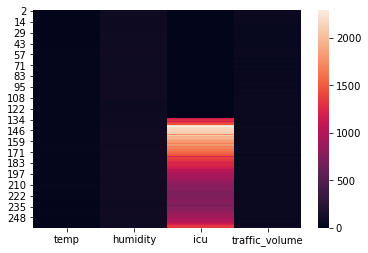

In [16]:
sns.heatmap(df.drop("date", axis = 1).drop("confirmed", axis = 1))

In [17]:
from sklearn.linear_model import LinearRegression    #import machine learning packages
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression

In [18]:
X, y = df[["temp", 'humidity', "icu", "traffic_volume" ]], df["confirmed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)#split dataset

In [19]:
lm = LinearRegression()    #Linear Regression
lm.fit(X_train, y_train)
res_LR = lm.predict(X_test)

In [20]:
regressor = XGBRegressor()  #XGB Regressor
regressor.fit(X_train, y_train)
res_XGB = regressor.predict(X_test)

In [21]:
svr =SVR(C = 0.5)    #Support Vector Machine
svr.fit(X_train, y_train)
res_SVR = svr.predict(X_test)

In [22]:
mlp = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu',solver='adam',alpha=0.01,max_iter=50000)    #MLP Regressor
mlp.fit(X_train,y_train)
res_MLP = mlp.predict(X_test)

In [23]:
logistic = LogisticRegression(C = 1, max_iter = 1e7)
logistic.fit(X_train, y_train)
res_LOG = logistic.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn import metrics    #calculate the mean squre error of the models
def calMSE(predictList, testList, name):
    print("The MSE of the regression model " + name + " is : %.4f" % (metrics.mean_squared_error(testList, predictList)))
    print("The R^2 of the regression model " + name + " is : %.4f" % (metrics.r2_score(testList,predictList)))

In [25]:
calMSE(res_LR, y_test, "Linear Regressor")    #show the result
calMSE(res_SVR, y_test, "SVR Regressor")
calMSE(res_LOG, y_test, "Logistic Regressor")
calMSE(res_XGB, y_test, "XGB Regressor")
calMSE(res_MLP, y_test, "MLP Regressor")

The MSE of the regression model Linear Regressor is : 59115793490.1905
The R^2 of the regression model Linear Regressor is : 0.5361
The MSE of the regression model SVR Regressor is : 143231449030.1893
The R^2 of the regression model SVR Regressor is : -0.1239
The MSE of the regression model Logistic Regressor is : 17432926185.7125
The R^2 of the regression model Logistic Regressor is : 0.8632
The MSE of the regression model XGB Regressor is : 13252068369.4420
The R^2 of the regression model XGB Regressor is : 0.8960
The MSE of the regression model MLP Regressor is : 12611696256.2392
The R^2 of the regression model MLP Regressor is : 0.9010
